### Assignment 1,2: Implement preprocessing tasks in data mining which are data cleaning, data reduction, data integration and data transformation.

In [42]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#read the weather dataset using pandas
titanic_train=pd.read_csv('titanic_train.csv')
titanic_test=pd.read_csv('titanic_test.csv')

In [44]:
#to see first five rows of train data use head function
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#to see first five rows of test data use head function
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#display the shape of training dataset
titanic_train.shape

(891, 12)

In [7]:
#display the shape of testing dataset
titanic_test.shape

(891, 12)

In [8]:
#datatypes of training dataset
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#datatypes of testing dataset
titanic_test.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
#to print the information of train dataset
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#to print the information of test dataset
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#print number of coloums in train dataset
no_of_coloums=len(list(titanic_train))
no_of_coloums

12

In [13]:
#print number of coloums in test dataset
no_of_coloums=len(list(titanic_test))
no_of_coloums

12

In [14]:
#description of train dataframe
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
#description of test dataframe
titanic_test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**PREPROCESSING**

In [17]:
#remove the unnecessary coloum from training and testing dataset
titanic_train=titanic_train.drop(['Cabin','PassengerId','Name','Ticket','Embarked'],1)
titanic_test=titanic_test.drop(['Cabin','PassengerId','Name','Ticket','Embarked'],1)

In [18]:
#display training dataset
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [19]:
#display testing dataset
titanic_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [20]:
#remove duplicate from training and testing dataset
titanic_train=titanic_train.drop_duplicates()
titanic_test=titanic_test.drop_duplicates()

In [21]:
#total no of duplicates
sum(titanic_train.duplicated())

0

In [22]:
sum(titanic_test.duplicated())

0

In [23]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [24]:
#data manipulation using dummy values
titanic_train=pd.get_dummies(titanic_train,prefix=None,prefix_sep='_',)
titanic_test=pd.get_dummies(titanic_test,prefix=None,prefix_sep='_',)


In [25]:
titanic_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,1,0
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,NaN,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


In [26]:
titanic_test

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,1,0
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,NaN,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Sex_female'}>,
        <AxesSubplot:title={'center':'Sex_male'}>, <AxesSubplot:>]],
      dtype=object)

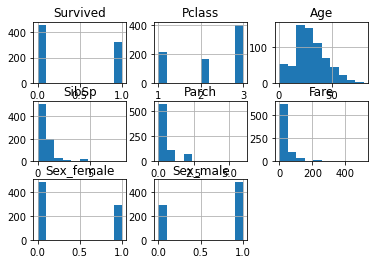

In [27]:
#plot histogram
titanic_train.hist()

In [28]:
#find missing values
titanic_train.isnull().sum()

Survived        0
Pclass          0
Age           103
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
dtype: int64

In [29]:
#fill missing values in Age column with mean
titanic_train_mean_age = titanic_train['Age'].mean()
titanic_train.fillna(titanic_train_mean_age,inplace=True)

In [30]:
#check if all missing values are replaced
titanic_train.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

In [31]:
#find missing values in test dataset
titanic_test.isnull().sum()

Survived        0
Pclass          0
Age           103
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
dtype: int64

In [32]:
#fill missing values in Age column with mean
titanic_test_mean_age = titanic_test['Age'].mean()

titanic_test.fillna(titanic_test_mean_age,inplace=True)

In [33]:
#check if all missing values are replaced
titanic_test.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

<AxesSubplot:>

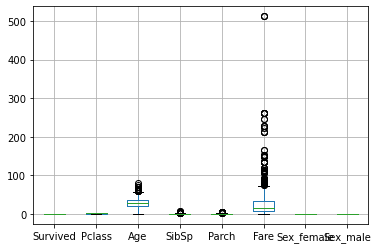

In [34]:
#plot boxplot to find the outlier
titanic_train.boxplot()

In [35]:
titanic_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.000000,1,0,7.2500,0,1
1,1,1,38.000000,1,0,71.2833,1,0
2,1,3,26.000000,0,0,7.9250,1,0
3,1,1,35.000000,1,0,53.1000,1,0
4,0,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.000000,0,5,29.1250,1,0
887,1,1,19.000000,0,0,30.0000,1,0
888,0,3,29.819614,1,2,23.4500,1,0
889,1,1,26.000000,0,0,30.0000,0,1


In [36]:
#assigning x variable to the independent variables
x=titanic_train.drop('Survived',1)

In [37]:
#assigning y variable to the dependent variable
y=titanic_train.Survived

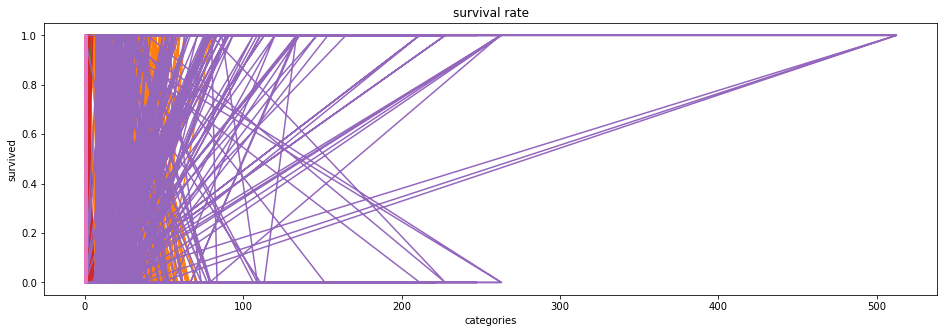

In [38]:
#ploting dependent and independent variables
plt.figure(figsize=(16,5))
plt.plot(x,y)
plt.title("survival rate")
plt.xlabel('categories')
plt.ylabel('survived')
plt.show()

In [39]:
#Integration- merging training and testing dataset
DataFrame=pd.concat([titanic_test,titanic_train])

In [41]:
#display dataset which is integrated
DataFrame

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.000000,1,0,7.2500,0,1
1,1,1,38.000000,1,0,71.2833,1,0
2,1,3,26.000000,0,0,7.9250,1,0
3,1,1,35.000000,1,0,53.1000,1,0
4,0,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.000000,0,5,29.1250,1,0
887,1,1,19.000000,0,0,30.0000,1,0
888,0,3,29.819614,1,2,23.4500,1,0
889,1,1,26.000000,0,0,30.0000,0,1
